# Pre-processing & data exploration

### Q&A
- Should we include the "Id" column in both X_train and y_train DataFrames? -> *Not needed*
- Do we want to exclude some of the outliers? At least if we start optimizing the results, we could try that.

### Key points:
- All of the training data is valid; that is, there are no missing or mismatched values for any of the variables. This observation is based on the variable-specific graphs available in Kaggle
- Test data has one missing column after one-hot encoding for "parentspecies"

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Pre-processing

### Training data

In [2]:
training_data = pd.read_csv("data/train.csv")

X_train = training_data.drop(columns=["Id", "pSat_Pa"], axis=1)
X_train = pd.get_dummies(X_train, columns=["parentspecies"], prefix="category") # One-hot encoding
X_train = X_train.sort_index(axis=1) # X-train & X-test need to have the same column order

y_train = training_data.copy()[["pSat_Pa"]]
y_train["pSat_Pa"] = np.log10(y_train["pSat_Pa"])

y_train.head()

,pSat_Pa
0,5.807518
1,4.012656
2,4.130899
3,2.383151
4,2.498802


### Test data

In [3]:
test_data = pd.read_csv("data/test.csv")

X_test = test_data.drop(columns=["Id"], axis=1)
X_test = pd.get_dummies(X_test, columns=["parentspecies"], prefix="category") # One-hot encoding
X_test["category_decane_toluene"] = 0 # Add missing column with default value 0 (compared to X_train)
X_test = X_test.sort_index(axis=1) # X-train & X-test need to have the same column order

### Check data consistency

X_train & X_test need to have the same columns

In [4]:
print(X_train.columns)

Index(['C.C..non.aromatic.', 'C.C.C.O.in.non.aromatic.ring', 'MW',
       'NumHBondDonors', 'NumOfAtoms', 'NumOfC', 'NumOfConf', 'NumOfConfUsed',
       'NumOfN', 'NumOfO', 'aldehyde', 'aromatic.hydroxyl',
       'carbonylperoxyacid', 'carbonylperoxynitrate', 'carboxylic.acid',
       'category_None', 'category_apin', 'category_apin_decane',
       'category_apin_decane_toluene', 'category_apin_toluene',
       'category_decane', 'category_decane_toluene', 'category_toluene',
       'ester', 'ether..alicyclic.', 'hydroperoxide', 'hydroxyl..alkyl.',
       'ketone', 'nitrate', 'nitro', 'nitroester', 'peroxide'],
      dtype='object')


In [5]:
print(X_test.columns)

Index(['C.C..non.aromatic.', 'C.C.C.O.in.non.aromatic.ring', 'MW',
       'NumHBondDonors', 'NumOfAtoms', 'NumOfC', 'NumOfConf', 'NumOfConfUsed',
       'NumOfN', 'NumOfO', 'aldehyde', 'aromatic.hydroxyl',
       'carbonylperoxyacid', 'carbonylperoxynitrate', 'carboxylic.acid',
       'category_None', 'category_apin', 'category_apin_decane',
       'category_apin_decane_toluene', 'category_apin_toluene',
       'category_decane', 'category_decane_toluene', 'category_toluene',
       'ester', 'ether..alicyclic.', 'hydroperoxide', 'hydroxyl..alkyl.',
       'ketone', 'nitrate', 'nitro', 'nitroester', 'peroxide'],
      dtype='object')


In [6]:
X_train.head()

,C.C..non.aromatic.,C.C.C.O.in.non.aromatic.ring,MW,NumHBondDonors,NumOfAtoms,NumOfC,NumOfConf,NumOfConfUsed,NumOfN,NumOfO,...,category_toluene,ester,ether..alicyclic.,hydroperoxide,hydroxyl..alkyl.,ketone,nitrate,nitro,nitroester,peroxide
0,0,0,30.010565,0,4,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,74.995643,0,6,1,1,1,1,3,...,1,0,0,0,0,0,0,1,0,0
2,0,0,102.990558,0,8,2,2,2,1,4,...,1,0,0,0,0,0,0,1,0,0
3,0,0,118.985472,1,9,2,3,1,1,5,...,1,0,0,0,0,0,0,1,0,0
4,0,0,134.980387,1,10,2,3,3,1,6,...,1,0,0,0,0,0,0,1,0,0


In [7]:
X_test.head()

,C.C..non.aromatic.,C.C.C.O.in.non.aromatic.ring,MW,NumHBondDonors,NumOfAtoms,NumOfC,NumOfConf,NumOfConfUsed,NumOfN,NumOfO,...,category_toluene,ester,ether..alicyclic.,hydroperoxide,hydroxyl..alkyl.,ketone,nitrate,nitro,nitroester,peroxide
0,0,0,117.990223,1,10,3,5,4,0,5,...,1,1,0,1,0,0,0,0,0,0
1,0,0,329.981903,1,28,6,197,40,2,14,...,1,0,0,0,1,0,0,0,0,1
2,0,0,300.007724,2,28,6,302,40,2,12,...,1,0,0,1,1,1,1,0,0,0
3,0,0,251.064116,2,30,8,252,21,1,8,...,0,0,0,1,1,1,1,0,0,0
4,0,0,194.042653,3,23,6,190,40,0,7,...,1,0,1,2,1,1,0,0,0,0


In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27147 entries, 0 to 27146
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   C.C..non.aromatic.            27147 non-null  int64  
 1   C.C.C.O.in.non.aromatic.ring  27147 non-null  int64  
 2   MW                            27147 non-null  float64
 3   NumHBondDonors                27147 non-null  int64  
 4   NumOfAtoms                    27147 non-null  int64  
 5   NumOfC                        27147 non-null  int64  
 6   NumOfConf                     27147 non-null  int64  
 7   NumOfConfUsed                 27147 non-null  int64  
 8   NumOfN                        27147 non-null  int64  
 9   NumOfO                        27147 non-null  int64  
 10  aldehyde                      27147 non-null  int64  
 11  aromatic.hydroxyl             27147 non-null  int64  
 12  carbonylperoxyacid            27147 non-null  int64  
 13  c

In [9]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4490 entries, 0 to 4489
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   C.C..non.aromatic.            4490 non-null   int64  
 1   C.C.C.O.in.non.aromatic.ring  4490 non-null   int64  
 2   MW                            4490 non-null   float64
 3   NumHBondDonors                4490 non-null   int64  
 4   NumOfAtoms                    4490 non-null   int64  
 5   NumOfC                        4490 non-null   int64  
 6   NumOfConf                     4490 non-null   int64  
 7   NumOfConfUsed                 4490 non-null   int64  
 8   NumOfN                        4490 non-null   int64  
 9   NumOfO                        4490 non-null   int64  
 10  aldehyde                      4490 non-null   int64  
 11  aromatic.hydroxyl             4490 non-null   int64  
 12  carbonylperoxyacid            4490 non-null   int64  
 13  car

### Standard scaler

Scale the explainable features for better model performance. Tree-based models or Naive Bayes do not necessarily benefit from scaling, but most of the other models do.

In [10]:
standard_scaler = StandardScaler()

X_train_scaled = standard_scaler.fit_transform(X_train)
X_train_scaled_w_col_names =  pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_test_scaled = standard_scaler.transform(X_test)
X_test_scaled_w_col_names = pd.DataFrame(X_test_scaled, columns=X_test.columns)

### Preprocessed data to .csv

In [11]:
X_train.to_csv("data/preprocessed_X_train.csv", index=False)
y_train.to_csv("data/preprocessed_y_train.csv", index=False)
X_test.to_csv("data/preprocessed_X_test.csv", index=False)
X_train_scaled_w_col_names.to_csv("data/preprocessed_X_train_scaled.csv", index=False)
X_test_scaled_w_col_names.to_csv("data/preprocessed_X_test_scaled.csv", index=False)


## Data exploration

Plot each variable against the target variable.

### Non-standardized scale

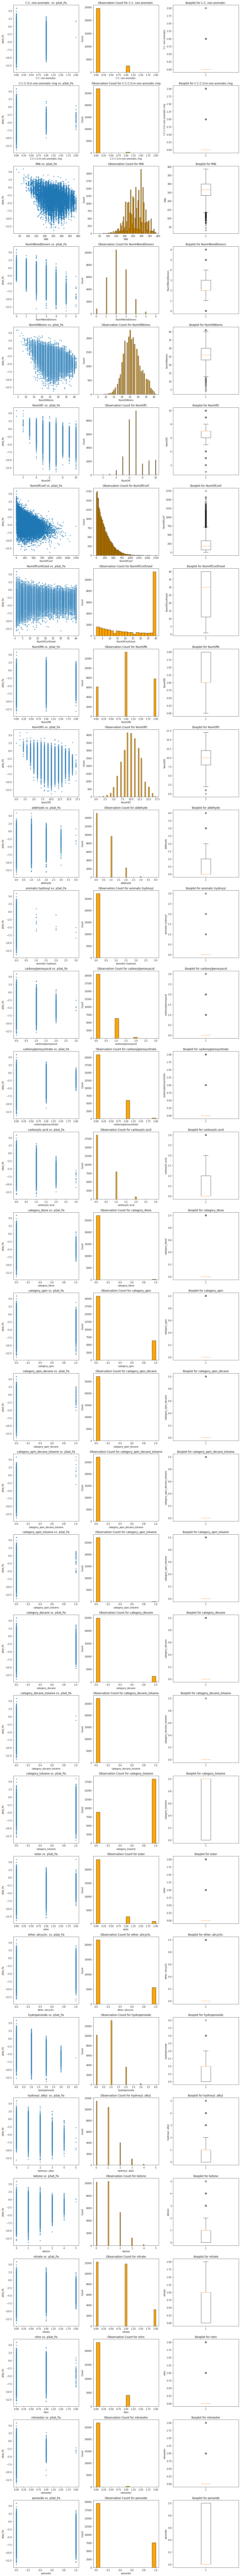

In [12]:
n = X_train.shape[1]

fig, axes = plt.subplots(n, 3, figsize=(15, 5 * n))

# Plot each column
for i in range(n):
    #Scatter plot
    axes[i,0].scatter(X_train.iloc[:, i], y_train, marker=".")
    axes[i,0].set_title(f"{X_train.columns[i]} vs. pSat_Pa")
    axes[i,0].set_xlabel(X_train.columns[i])
    axes[i,0].set_ylabel("pSat_Pa")

    # Add a histogram for the count of observations
    axes[i,1].hist(X_train.iloc[:,i], bins="auto", color="orange", edgecolor="black")
    axes[i,1].set_title(f"Observation Count for {X_train.columns[i]}")
    axes[i,1].set_xlabel(X_train.columns[i])
    axes[i,1].set_ylabel("Count")

    #Add a boxplot for a variable
    axes[i,2].boxplot(X_train.iloc[:, i])
    axes[i,2].set_title(f"Boxplot for {X_train.columns[i]}")
    axes[i,2].set_ylabel(X_train.columns[i])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

### Standardized scale

Repeat the plots with standardized scale.

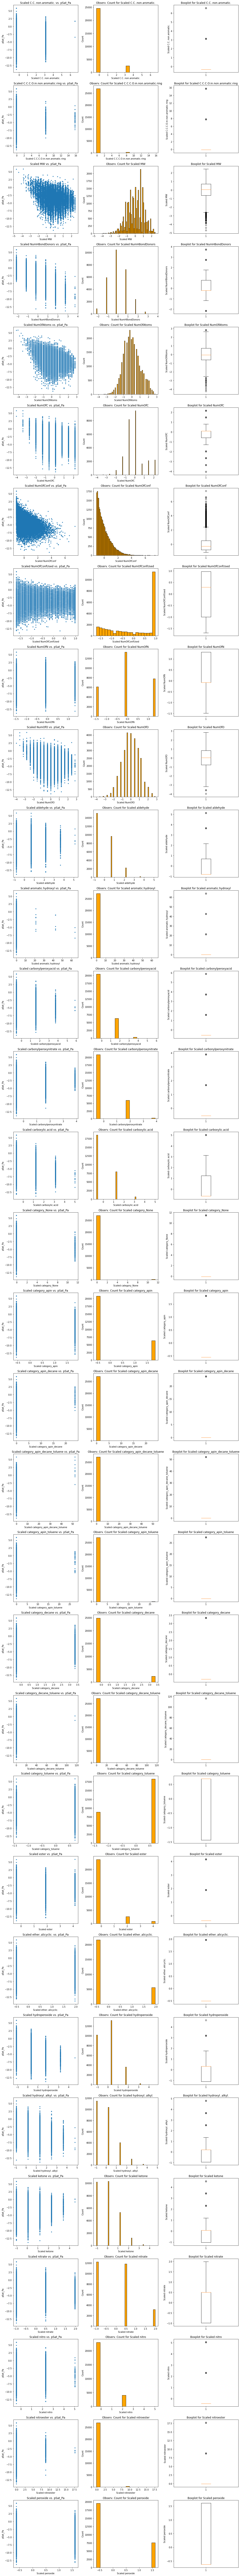

In [13]:
n = X_train_scaled_w_col_names.shape[1]

fig, axes = plt.subplots(n, 3, figsize=(15, 5 * n))

# Plot each column
for i in range(n):
    #Scatter plot
    axes[i,0].scatter(X_train_scaled_w_col_names.iloc[:, i], y_train, marker=".")
    axes[i,0].set_title(f"Scaled {X_train_scaled_w_col_names.columns[i]} vs. pSat_Pa")
    axes[i,0].set_xlabel(f"Scaled {X_train_scaled_w_col_names.columns[i]}")
    axes[i,0].set_ylabel("pSat_Pa")

    # Add a histogram for the count of observations
    axes[i,1].hist(X_train_scaled_w_col_names.iloc[:,i], bins="auto", color="orange", edgecolor="black")
    axes[i,1].set_title(f"Observ. Count for Scaled {X_train_scaled_w_col_names.columns[i]}")
    axes[i,1].set_xlabel(f"Scaled {X_train_scaled_w_col_names.columns[i]}")
    axes[i,1].set_ylabel("Count")

    #Add a boxplot for a variable
    axes[i,2].boxplot(X_train_scaled_w_col_names.iloc[:, i])
    axes[i,2].set_title(f"Boxplot for Scaled {X_train_scaled_w_col_names.columns[i]}")
    axes[i,2].set_ylabel(f"Scaled {X_train_scaled_w_col_names.columns[i]}")
 
# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()